In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
import folium

In [41]:
data = pd.read_parquet("data/train.parquet")
data.head()

counter_id              counter_name    site_id  \
48321  100007049-102007049  28 boulevard Diderot E-O  100007049   
48324  100007049-102007049  28 boulevard Diderot E-O  100007049   
48327  100007049-102007049  28 boulevard Diderot E-O  100007049   
48330  100007049-102007049  28 boulevard Diderot E-O  100007049   
48333  100007049-102007049  28 boulevard Diderot E-O  100007049   

                  site_name  bike_count                date  \
48321  28 boulevard Diderot         0.0 2020-09-01 02:00:00   
48324  28 boulevard Diderot         1.0 2020-09-01 03:00:00   
48327  28 boulevard Diderot         0.0 2020-09-01 04:00:00   
48330  28 boulevard Diderot         4.0 2020-09-01 15:00:00   
48333  28 boulevard Diderot         9.0 2020-09-01 18:00:00   

      counter_installation_date         coordinates counter_technical_id  \
48321                2013-01-18  48.846028,2.375429          Y2H15027244   
48324                2013-01-18  48.846028,2.375429          Y2H15027244   
48327                2013-01-18  48.846028,2.375429          Y2H15027244   
48330                2013-01-18  48.846028,2.375429          Y2H15027244   
48333                2013-01-18  48.846028,2.375429          Y2H15027244   

        latitude  longitude  log_bike_count  
48321  48.846028   2.375429        0.000000  
48324  48.846028   2.375429        0.693147  
48327  48.846028   2.375429        0.000000  
48330  48.846028   2.375429        1.609438  
48333  48.846028   2.375429        2.302585

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496827 entries, 48321 to 929187
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   counter_id                 496827 non-null  category      
 1   counter_name               496827 non-null  category      
 2   site_id                    496827 non-null  int64         
 3   site_name                  496827 non-null  category      
 4   bike_count                 496827 non-null  float64       
 5   date                       496827 non-null  datetime64[us]
 6   counter_installation_date  496827 non-null  datetime64[us]
 7   coordinates                496827 non-null  category      
 8   counter_technical_id       496827 non-null  category      
 9   latitude                   496827 non-null  float64       
 10  longitude                  496827 non-null  float64       
 11  log_bike_count             496827 non-null  float64  

In [43]:
data.describe(include="all").T

count unique  \
counter_id                   496827     56   
counter_name                 496827     56   
site_id                    496827.0    NaN   
site_name                    496827     30   
bike_count                 496827.0    NaN   
date                         496827    NaN   
counter_installation_date    496827    NaN   
coordinates                  496827     30   
counter_technical_id         496827     30   
latitude                   496827.0    NaN   
longitude                  496827.0    NaN   
log_bike_count             496827.0    NaN   

                                                                    top  \
counter_id                                          100007049-101007049   
counter_name               Face au 4 avenue de la porte de Bagnolet O-E   
site_id                                                             NaN   
site_name                                        Face au 40 quai D'Issy   
bike_count                                                          NaN   
date                                                                NaN   
counter_installation_date                                           NaN   
coordinates                                            48.82636,2.30303   
counter_technical_id                                        Y2H15027244   
latitude                                                            NaN   
longitude                                                           NaN   
log_bike_count                                                      NaN   

                            freq                        mean  \
counter_id                  8974                         NaN   
counter_name                8974                         NaN   
site_id                      NaN            105344993.090259   
site_name                  17948                         NaN   
bike_count                   NaN                   60.191475   
date                         NaN  2021-03-08 07:25:59.668858   
counter_installation_date    NaN  2019-04-04 07:24:35.245911   
coordinates                17948                         NaN   
counter_technical_id       17948                         NaN   
latitude                     NaN                   48.854343   
longitude                    NaN                    2.345479   
log_bike_count               NaN                    3.079917   

                                           min                  25%  \
counter_id                                 NaN                  NaN   
counter_name                               NaN                  NaN   
site_id                            100007049.0          100047546.0   
site_name                                  NaN                  NaN   
bike_count                                 0.0                  5.0   
date                       2020-09-01 01:00:00  2020-12-05 22:00:00   
counter_installation_date  2013-01-18 00:00:00  2018-11-29 00:00:00   
coordinates                                NaN                  NaN   
counter_technical_id                       NaN                  NaN   
latitude                              48.82636            48.840801   
longitude                              2.26542              2.31444   
log_bike_count                             0.0             1.791759   

                                           50%                  75%  \
counter_id                                 NaN                  NaN   
counter_name                               NaN                  NaN   
site_id                            100056226.0          100056335.0   
site_name                                  NaN                  NaN   
bike_count                                29.0                 79.0   
date                       2021-03-08 11:00:00  2021-06-09 14:00:00   
counter_installation_date  2019-11-06 00:00:00  2019-12-11 00:00:00   
coordinates                                NaN                  NaN   
counter_technical_id                       NaN             

In [44]:
# Check for missing values
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_data = pd.DataFrame(
    {"Missing Values": missing_values, "Percentage": missing_percentage}
)
missing_data.sort_values(by="Missing Values", ascending=False)

Missing Values  Percentage
counter_id                              0         0.0
counter_name                            0         0.0
site_id                                 0         0.0
site_name                               0         0.0
bike_count                              0         0.0
date                                    0         0.0
counter_installation_date               0         0.0
coordinates                             0         0.0
counter_technical_id                    0         0.0
latitude                                0         0.0
longitude                               0         0.0
log_bike_count                          0         0.0

In [45]:
# Check for duplicate rows
duplicate_rows = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [46]:
data["date"] = pd.to_datetime(data["date"])

In [47]:
# Check data types and number of unique values
data_types = data.dtypes
unique_values = data.nunique()
data_overview = pd.DataFrame({"Data Type": data_types, "Unique Values": unique_values})
data_overview.sort_values(by="Unique Values", ascending=False)

Data Type  Unique Values
date                       datetime64[us]           8974
bike_count                        float64            998
log_bike_count                    float64            998
counter_id                       category             56
counter_name                     category             56
site_id                             int64             30
site_name                        category             30
coordinates                      category             30
counter_technical_id             category             30
latitude                          float64             30
longitude                         float64             30
counter_installation_date  datetime64[us]             22

In [48]:
def _add_lockdown(X):
    X = X.copy()

    lockdown_periods = [
        (pd.Timestamp("2020-03-17"), pd.Timestamp("2020-05-11")),
        (pd.Timestamp("2020-10-30"), pd.Timestamp("2020-12-15")),
        (pd.Timestamp("2021-04-03"), pd.Timestamp("2021-05-03")),
    ]

    # Function to check if a date is in a lockdown period
    def is_lockdown(date):
        for start, end in lockdown_periods:
            if start <= date <= end:
                return 1
        return 0

    # Apply lockdown logic
    X["lockdown"] = X["date"].apply(is_lockdown)

    return X


data = _add_lockdown(data)

In [49]:
# Correlation matrix
correlation_matrix = data.select_dtypes(include=["float", "int"]).corr()
correlation_matrix.style.background_gradient(cmap="coolwarm")

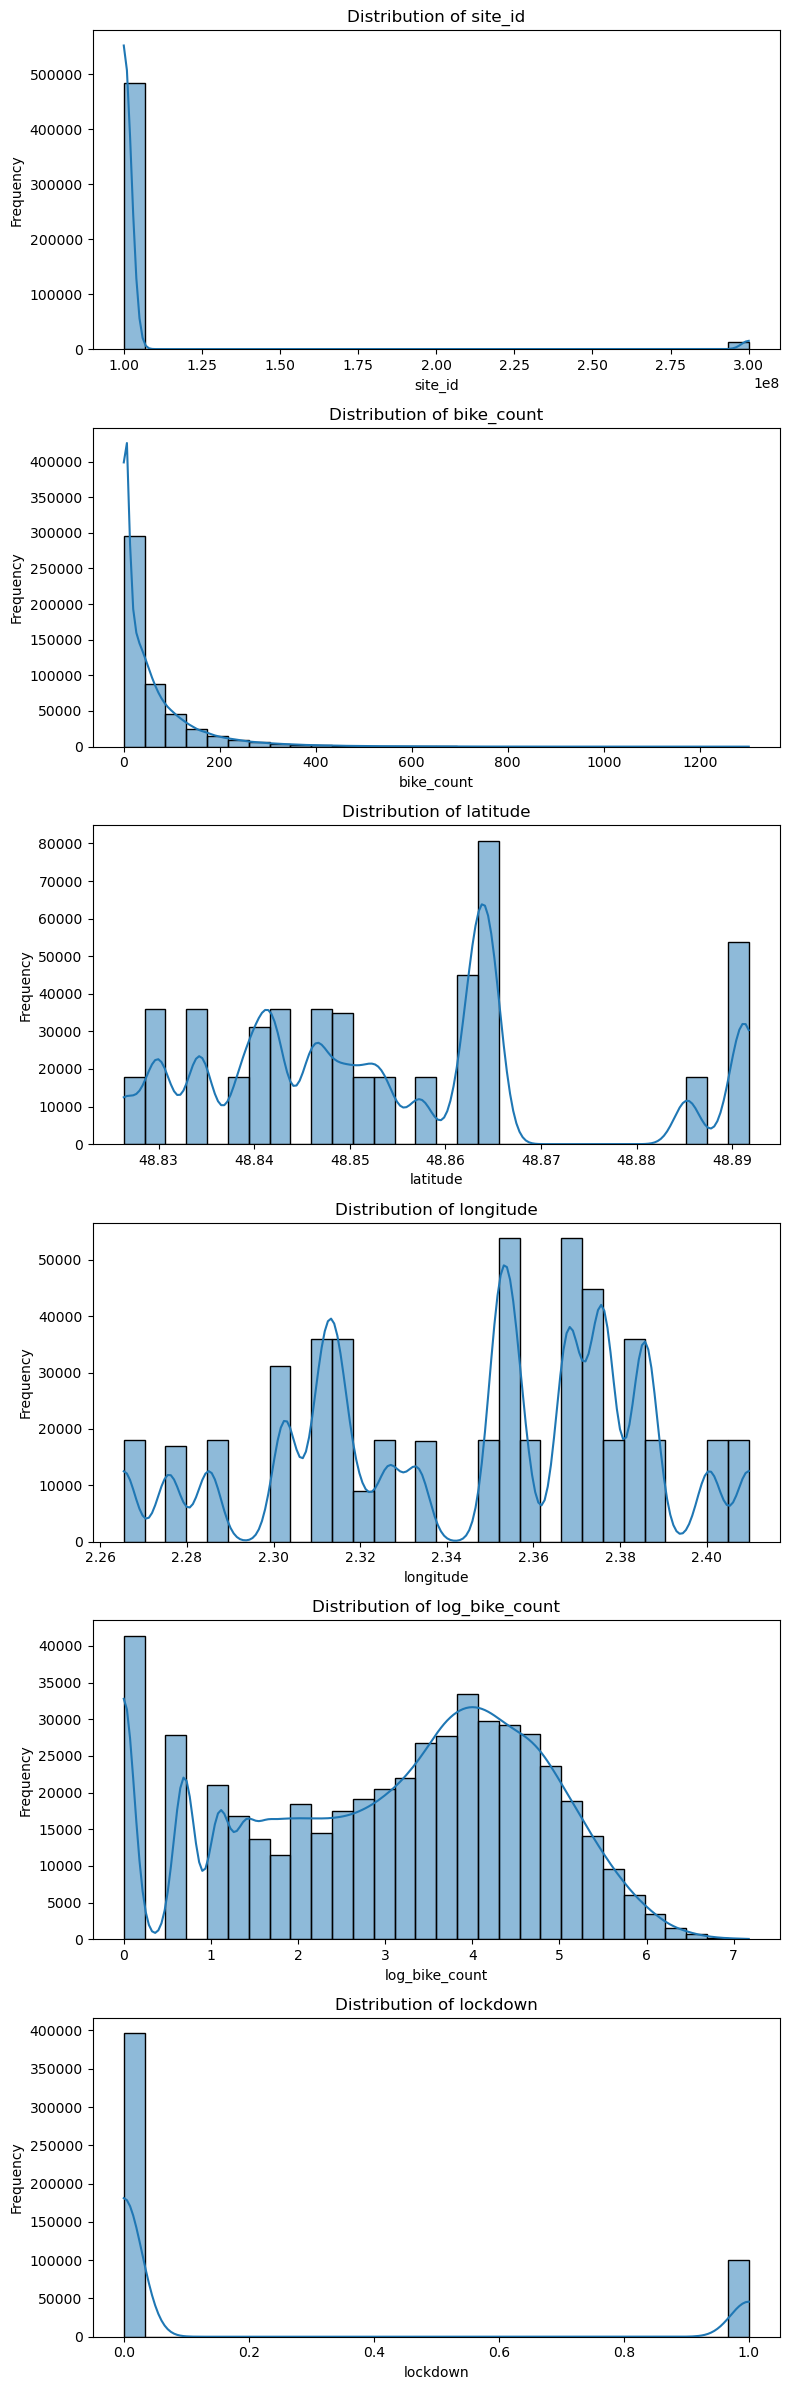

In [50]:
numeric_columns = data.select_dtypes(include=["float", "int"]).columns

num_cols = len(numeric_columns)
fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(8, 4 * num_cols))

for i, column in enumerate(numeric_columns):
    sns.histplot(data[column], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

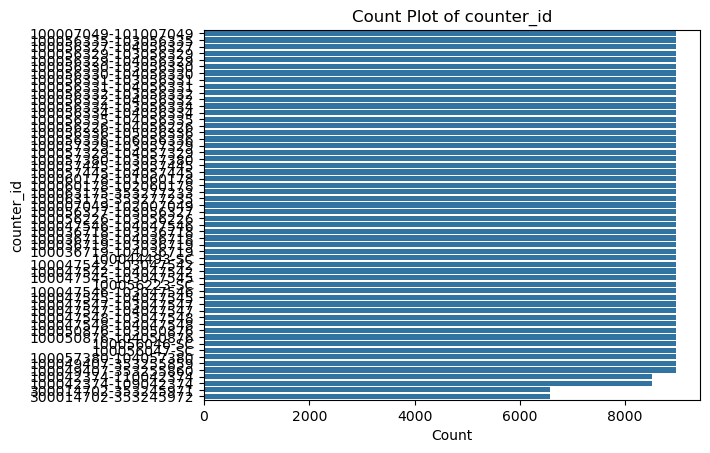

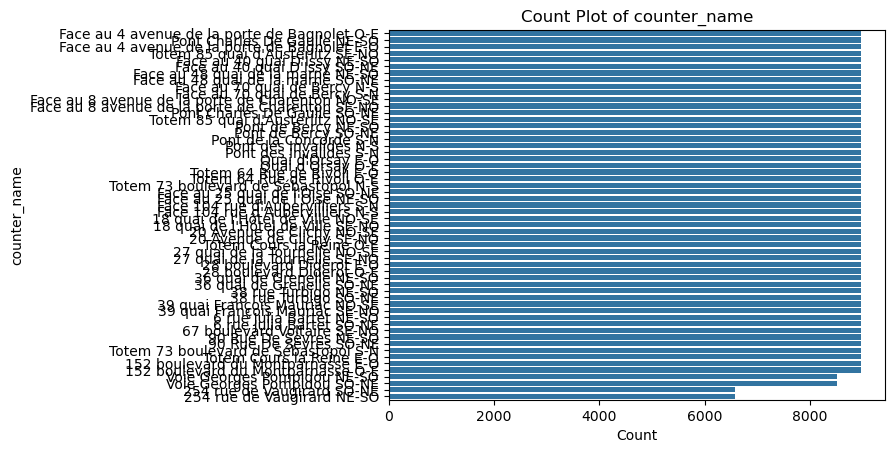

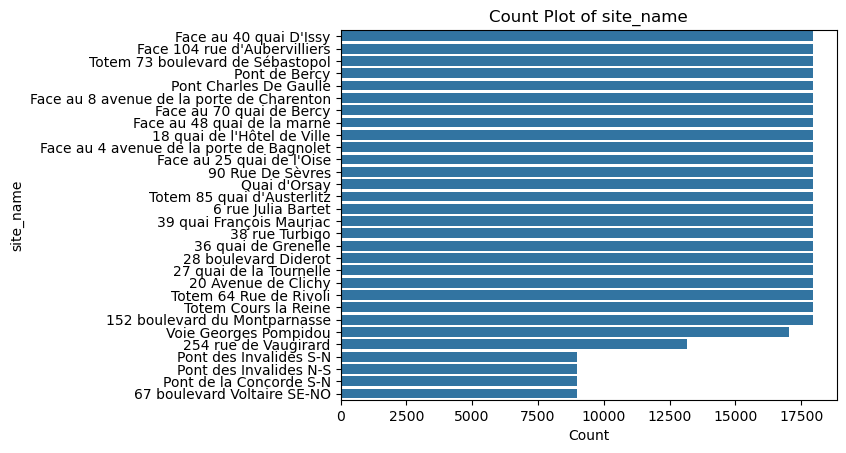

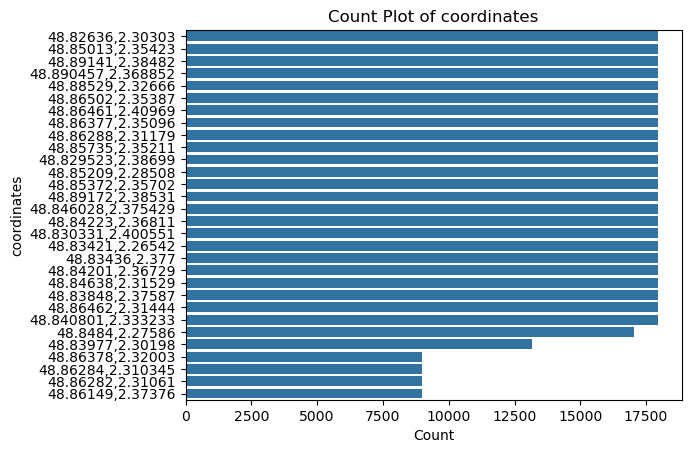

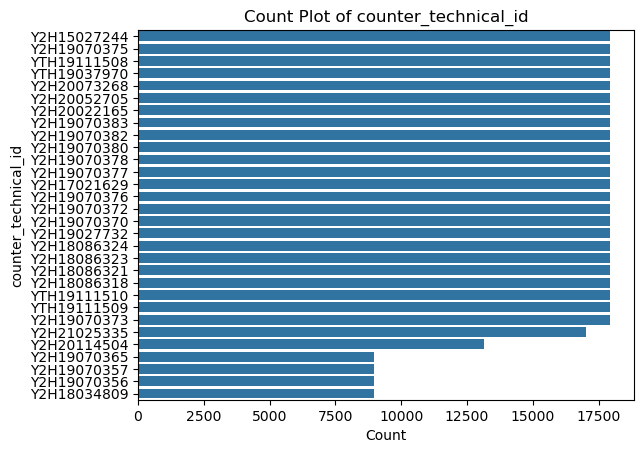

In [51]:
# Analysis of categorical features
categorical_columns = data.select_dtypes(include=["object", "category"]).columns
for column in categorical_columns:
    sns.countplot(y=data[column], order=data[column].value_counts().index)
    plt.title(f"Count Plot of {column}")
    plt.xlabel("Count")
    plt.ylabel(column)
    plt.show()

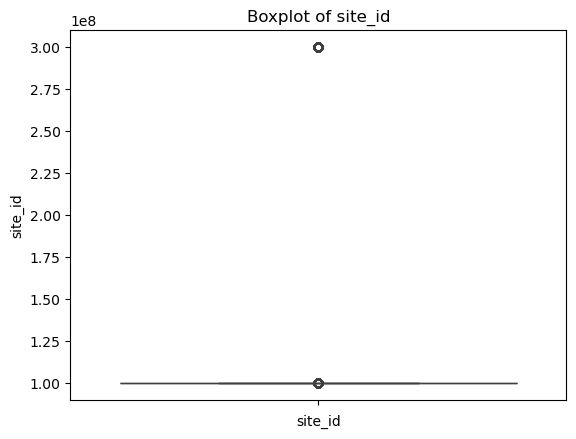

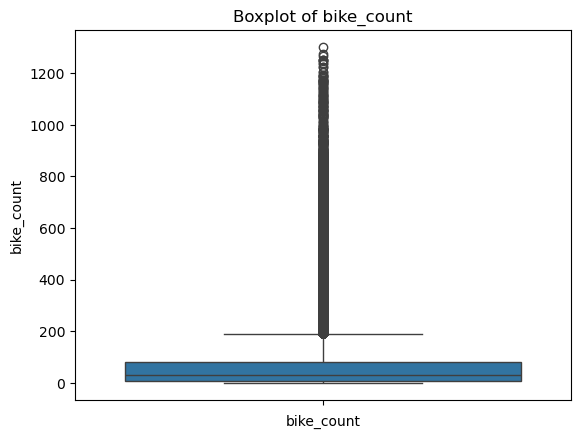

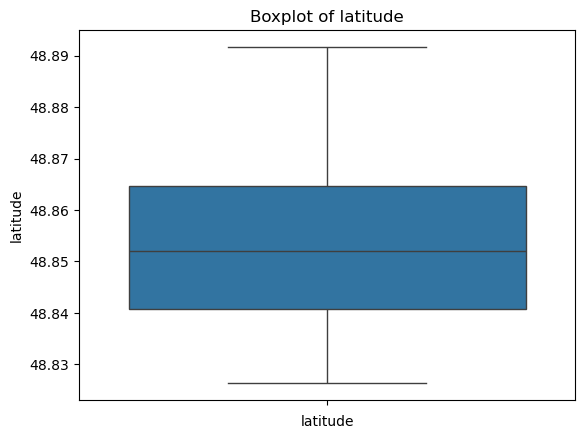

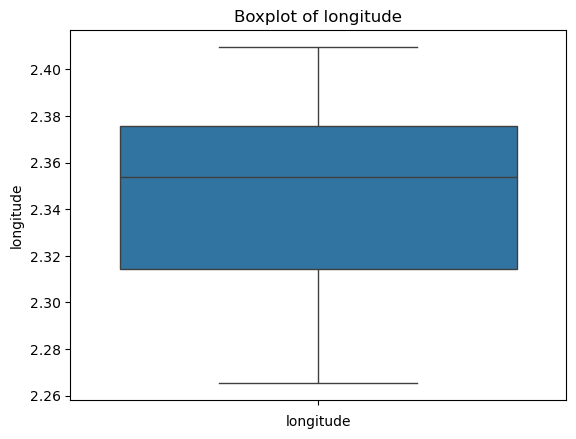

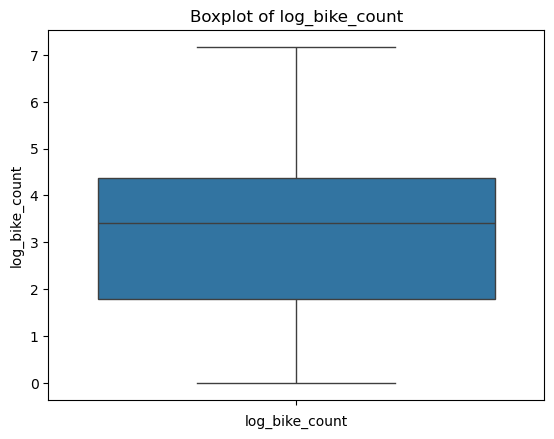

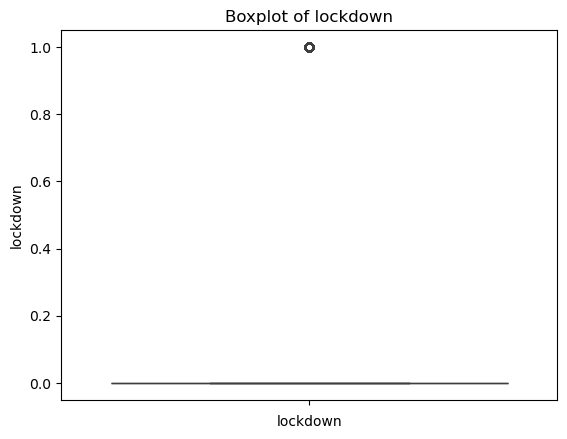

In [52]:
# Boxplots for outlier detection
for column in data.select_dtypes(include=["float", "int"]).columns:
    sns.boxplot(data[column])
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)
    plt.show()

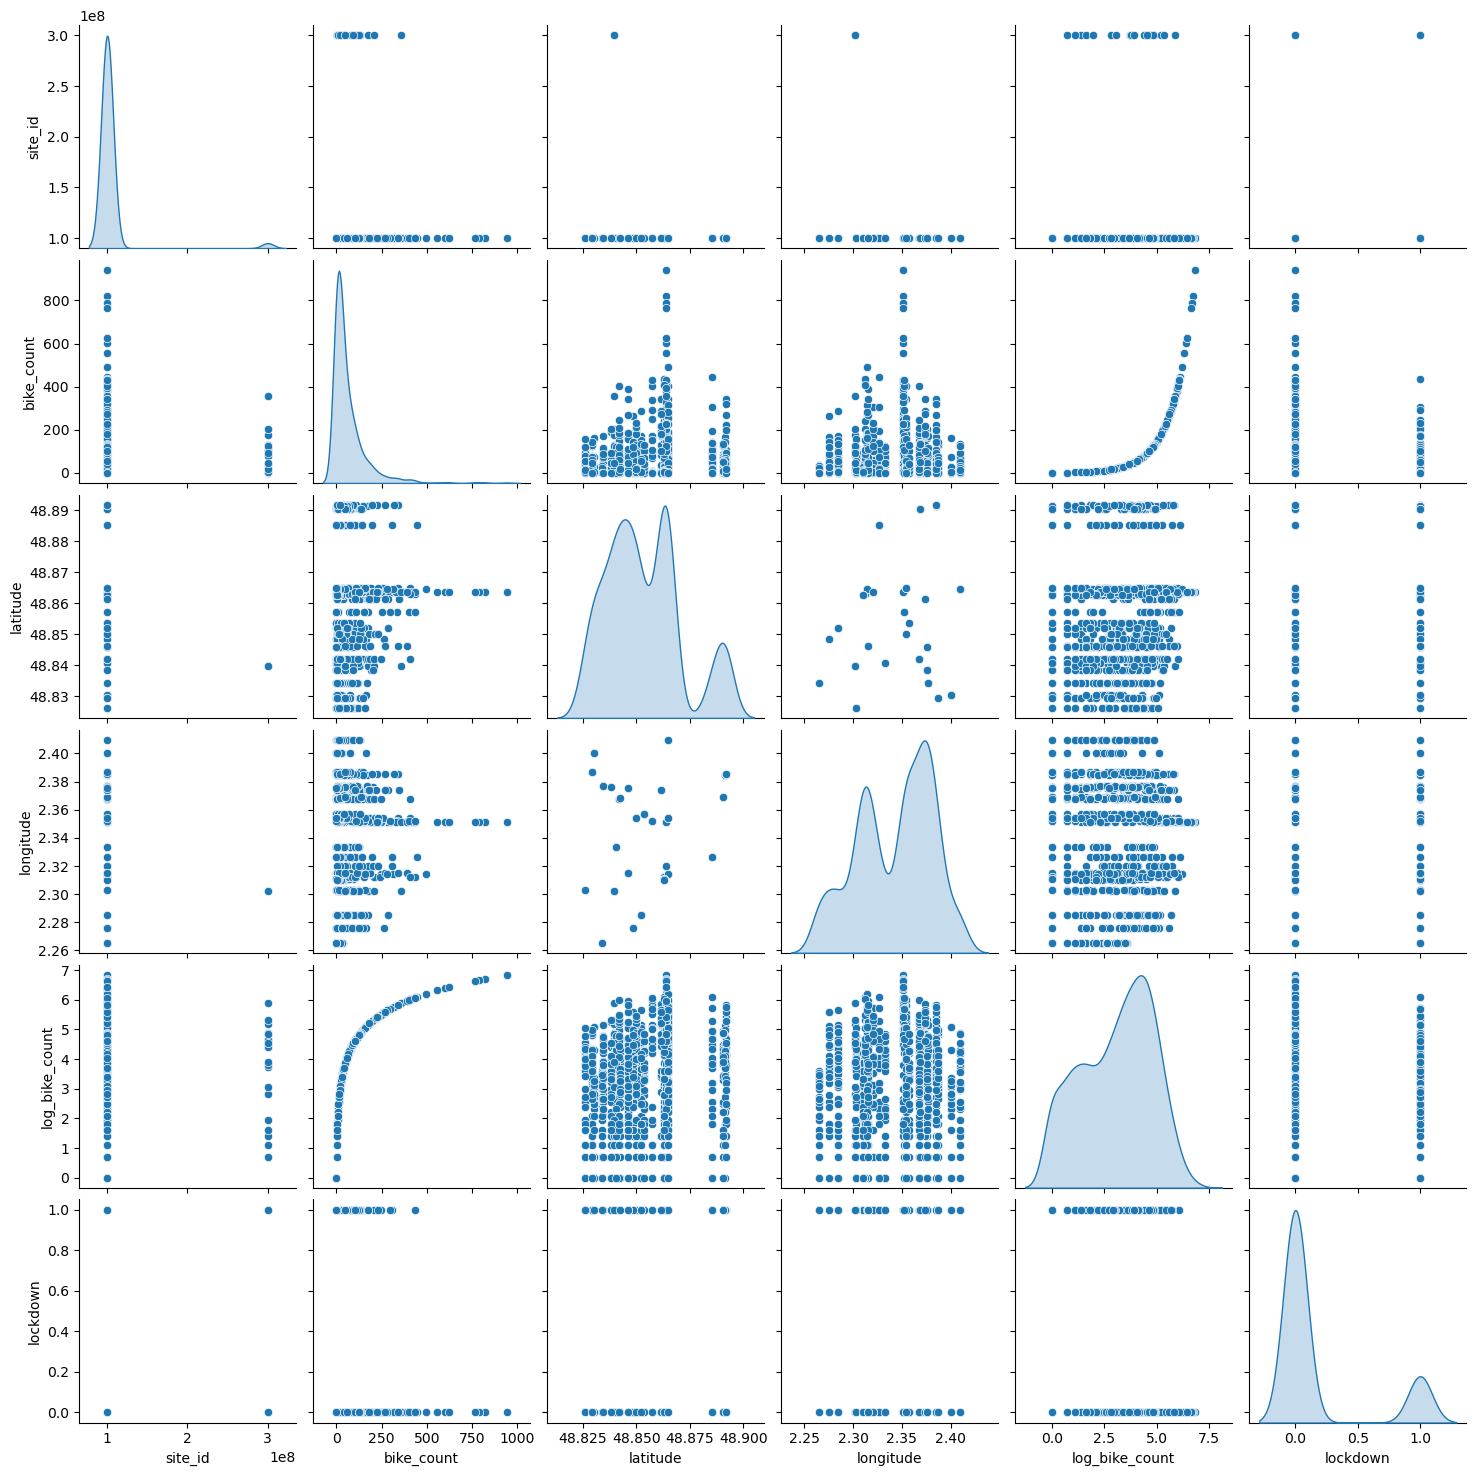

In [53]:
# Pairplot for feature relationships
sns.pairplot(data.sample(min(1000, len(data))), diag_kind="kde")
plt.show()

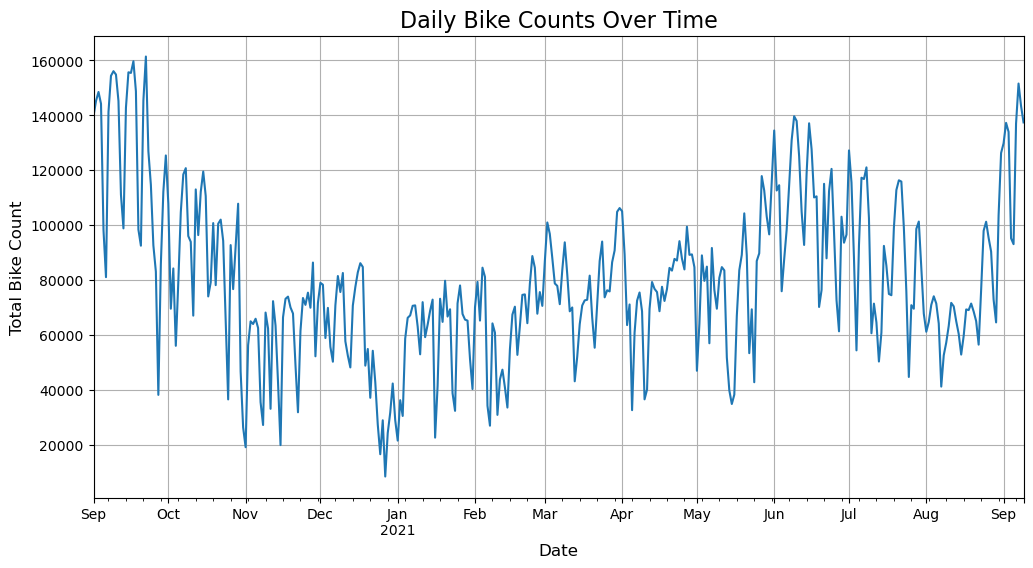

In [54]:
# Aggregate bike counts by day
daily_counts = data.resample("D", on="date")["bike_count"].sum()

# Plot daily trends
plt.figure(figsize=(12, 6))
daily_counts.plot()
plt.title("Daily Bike Counts Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Bike Count", fontsize=12)
plt.grid(True)
plt.show()

/var/folders/q_/t0vvj4pn7l9bcb6_mjhmgg080000gn/T/ipykernel_35230/3343787102.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette='viridis')


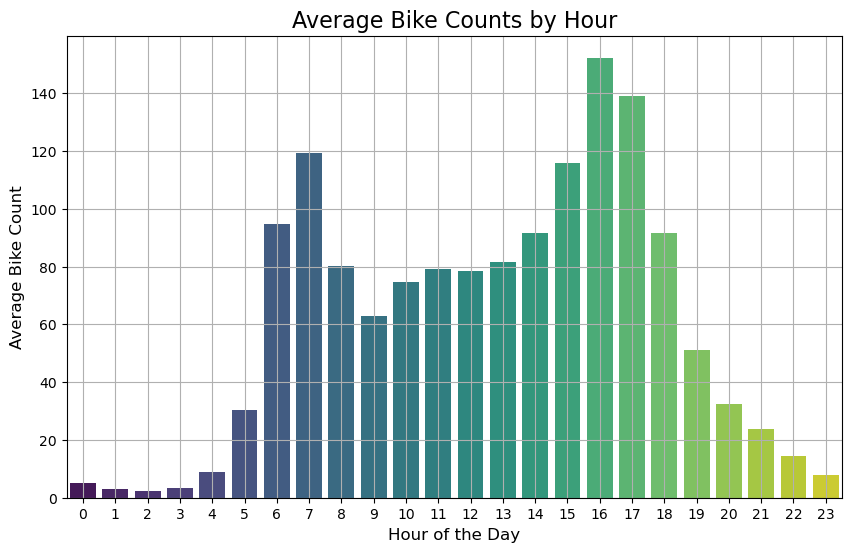

In [55]:
# Extract hour from datetime
data["hour"] = data["date"].dt.hour

# Average bike count per hour
hourly_counts = data.groupby("hour")["bike_count"].mean()

# Plot hourly patterns
plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette="viridis")
plt.title("Average Bike Counts by Hour", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Average Bike Count", fontsize=12)
plt.grid(True)
plt.show()

/var/folders/q_/t0vvj4pn7l9bcb6_mjhmgg080000gn/T/ipykernel_35230/1310888093.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekly_counts.index, y=weekly_counts.values, palette='coolwarm')


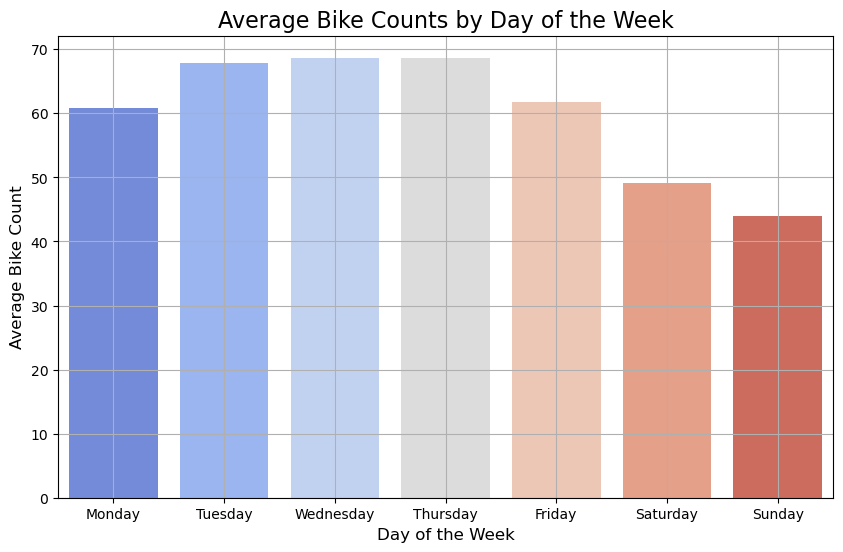

In [56]:
# Extract day of week
data["day_of_week"] = data["date"].dt.day_name()

# Average bike count by day of week
weekly_counts = data.groupby("day_of_week")["bike_count"].mean()

# Reorder days for a logical sequence
ordered_days = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]
weekly_counts = weekly_counts.reindex(ordered_days)

# Plot weekly patterns
plt.figure(figsize=(10, 6))
sns.barplot(x=weekly_counts.index, y=weekly_counts.values, palette="coolwarm")
plt.title("Average Bike Counts by Day of the Week", fontsize=16)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Average Bike Count", fontsize=12)
plt.grid(True)
plt.show()

/var/folders/q_/t0vvj4pn7l9bcb6_mjhmgg080000gn/T/ipykernel_35230/3174885367.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='Spectral')


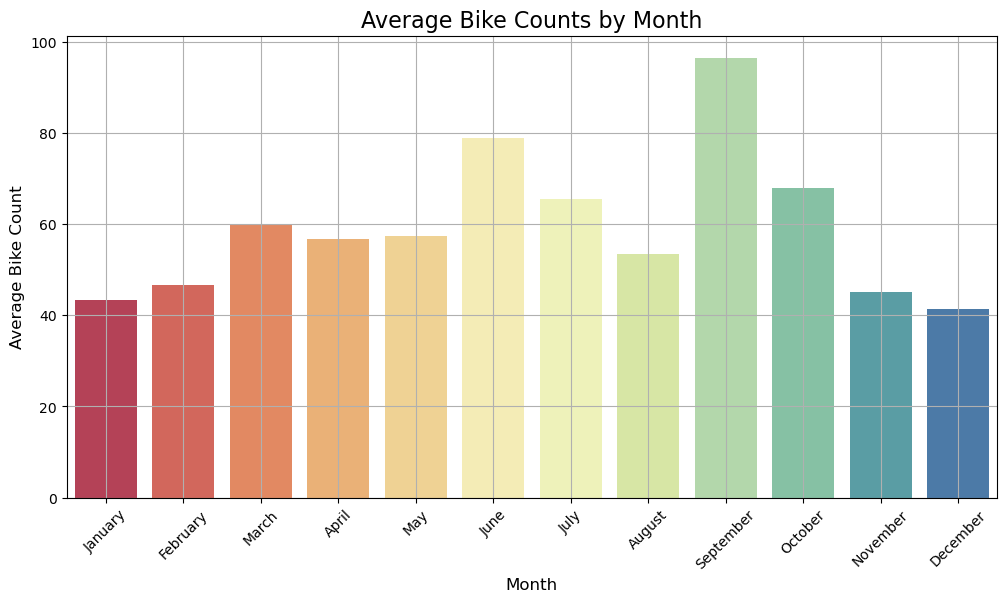

In [57]:
# Extract month
data["month"] = data["date"].dt.month_name()

# Average bike count by month
monthly_counts = data.groupby("month")["bike_count"].mean()

# Reorder months
ordered_months = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]
monthly_counts = monthly_counts.reindex(ordered_months)

# Plot monthly trends
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette="Spectral")
plt.title("Average Bike Counts by Month", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Bike Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [58]:
# Create a map centered at the mean latitude and longitude
m = folium.Map(
    location=data[["latitude", "longitude"]].mean(axis=0).values.tolist(), zoom_start=13
)

# Add markers for each unique counter_name
for _, row in (
    data[["counter_name", "latitude", "longitude"]]
    .drop_duplicates(subset="counter_name")
    .iterrows()
):
    folium.Marker(
        location=row[["latitude", "longitude"]].values.tolist(),
        popup=row["counter_name"],
    ).add_to(m)

# Display map
m

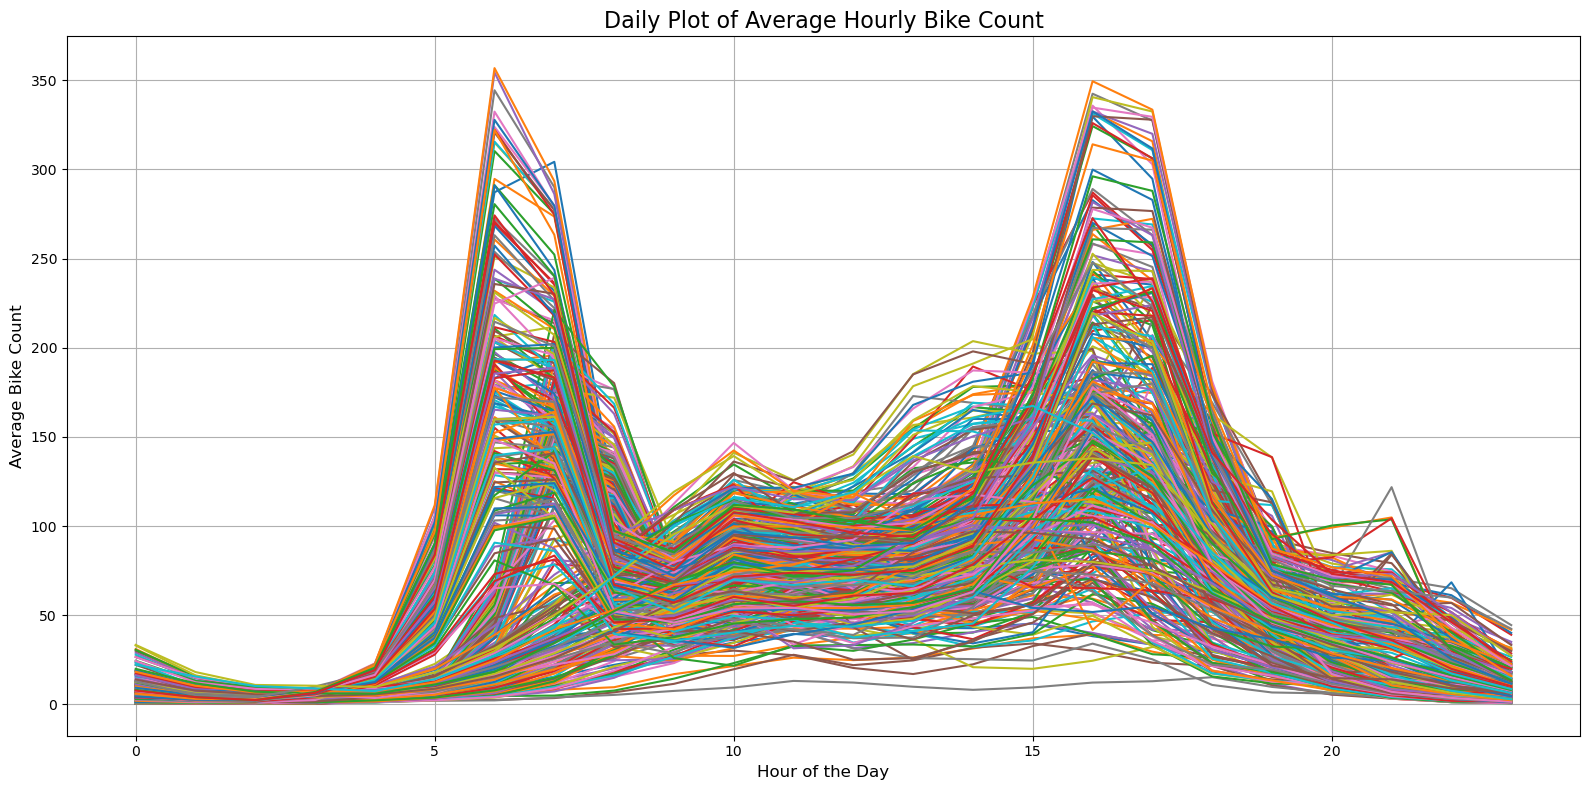

In [59]:
# Extract date and hour for grouping
data["hour"] = data["date"].dt.hour
data["day"] = data["date"].dt.date

# Group by day and hour to calculate the average bike count
hourly_avg = data.groupby(["day", "hour"])["bike_count"].mean().reset_index()

# Pivot table to reshape data for plotting
hourly_avg_pivot = hourly_avg.pivot(index="hour", columns="day", values="bike_count")

# Plot daily trends of average hourly counts
plt.figure(figsize=(16, 8))
for day in hourly_avg_pivot.columns:
    plt.plot(hourly_avg_pivot.index, hourly_avg_pivot[day], label=str(day))

plt.title("Daily Plot of Average Hourly Bike Count", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Average Bike Count", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

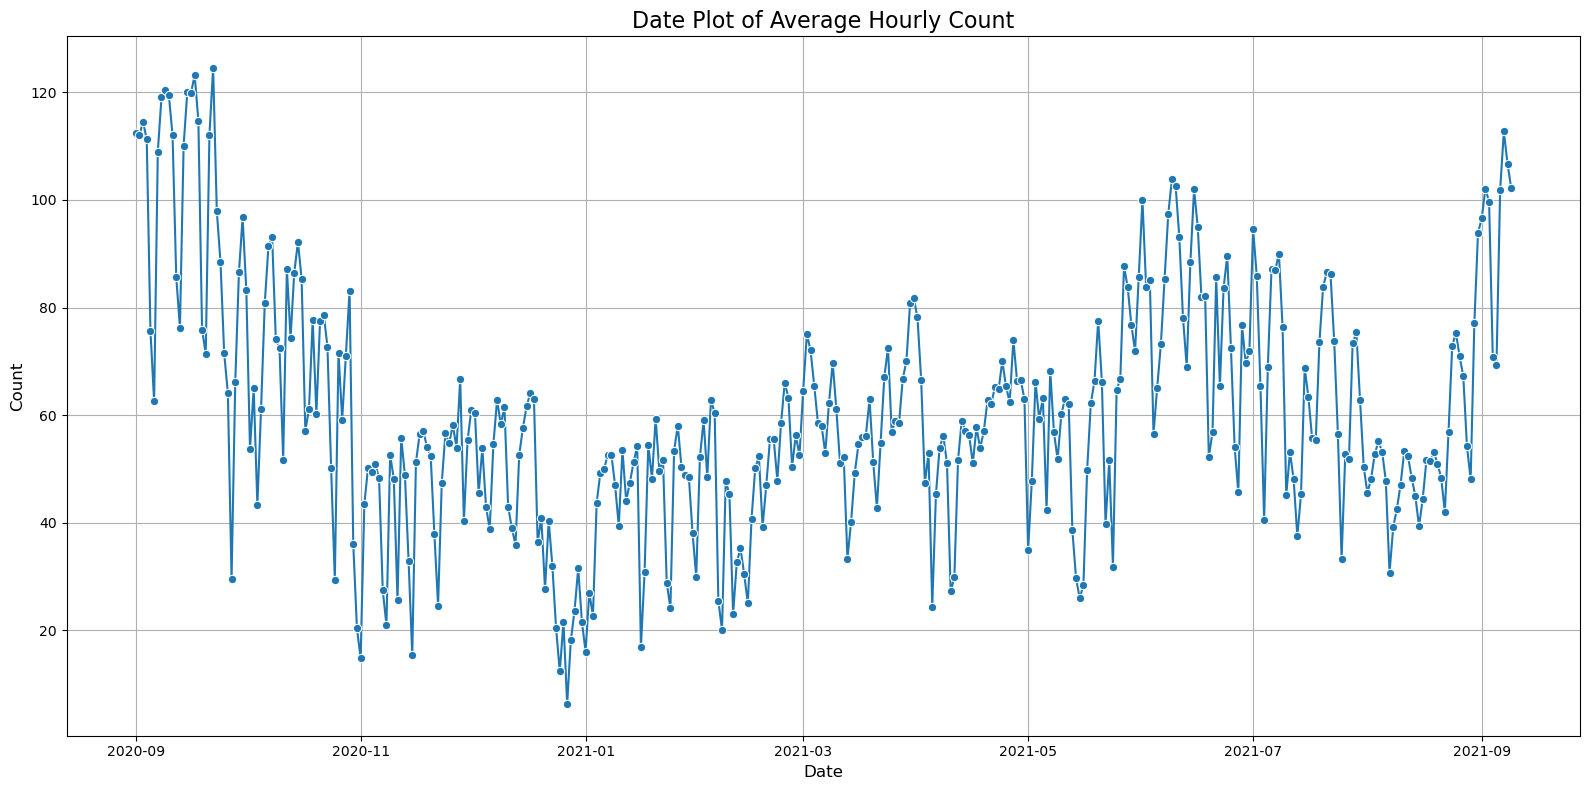

In [60]:
# Calculate daily average hourly count
daily_avg = data.groupby(data["date"].dt.date)["bike_count"].mean().reset_index()

# Plotting the daily average bike count
plt.figure(figsize=(16, 8))
sns.lineplot(x="date", y="bike_count", data=daily_avg, marker="o")

# Highlight specific points (e.g., anomalies or significant dates)
highlight_dates = ["2022-08-14", "2022-12-25"]  # Example dates
highlight_values = daily_avg[daily_avg["date"].isin(pd.to_datetime(highlight_dates))]

for _, row in highlight_values.iterrows():
    plt.annotate(
        row["date"].strftime("%B %d, %Y"),
        xy=(row["date"], row["bike_count"]),
        xytext=(row["date"], row["bike_count"] + 10),
        arrowprops=dict(facecolor="red", arrowstyle="->"),
        fontsize=10,
        color="red",
    )

plt.title("Date Plot of Average Hourly Count", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/q_/t0vvj4pn7l9bcb6_mjhmgg080000gn/T/ipykernel_35230/2904668656.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


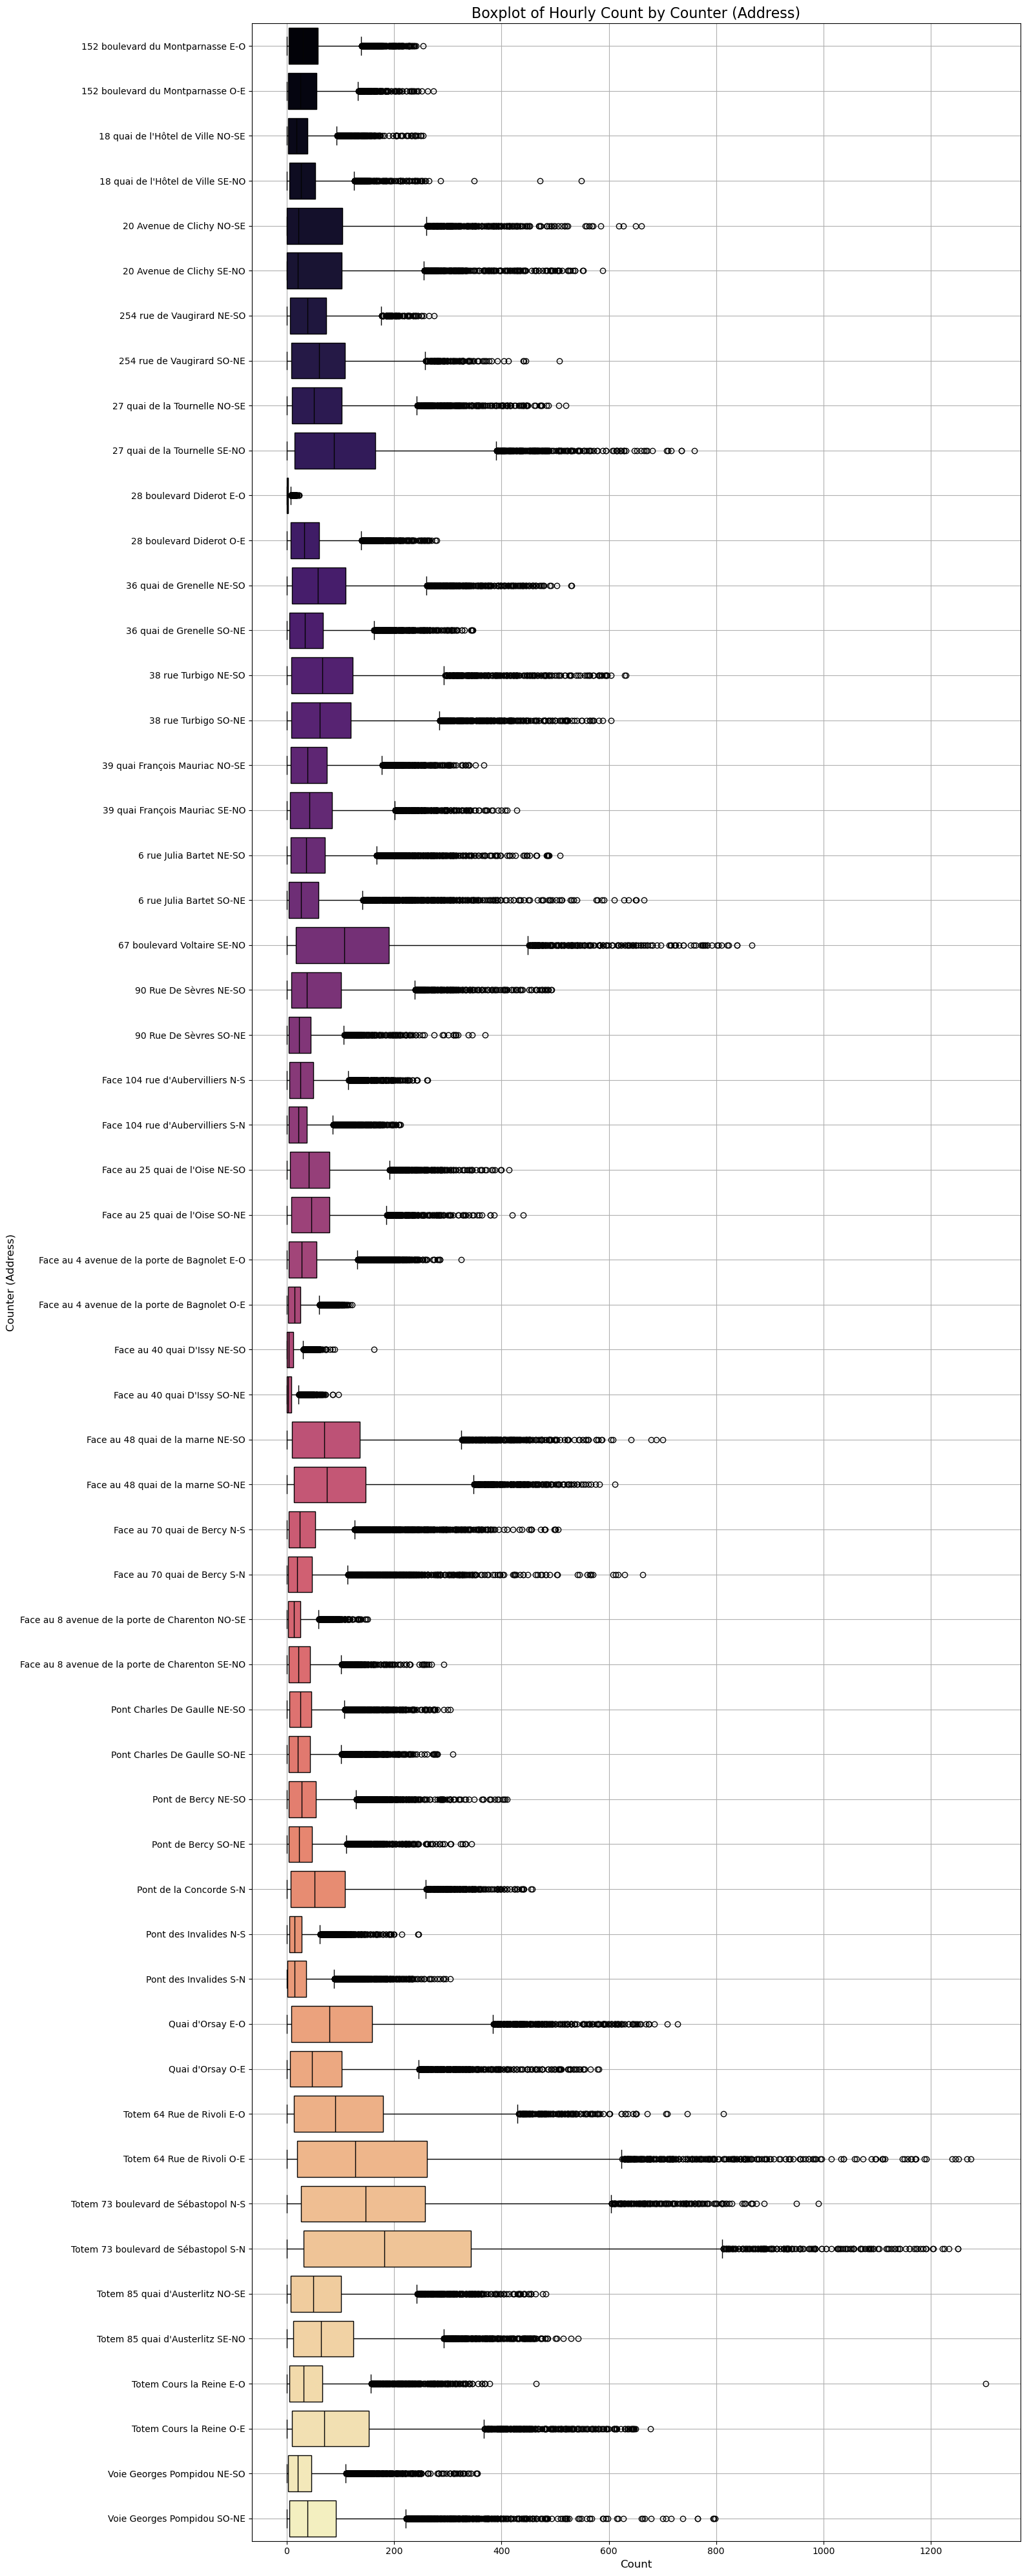

In [ ]:
# Filter the required columns
boxplot_data = data[["counter_name", "bike_count"]].dropna()

# Create the boxplot
plt.figure(figsize=(16, 40))
sns.boxplot(data=boxplot_data, x="bike_count", y="counter_name", palette="magma")

# Add labels and title
plt.title("Boxplot of Hourly Count by Counter (Address)", fontsize=16)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Counter (Address)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
weather_df = pd.read_csv("data/external_data.csv")

In [26]:
weather_df.describe()

numer_sta           pmer         tend     cod_tend           dd  \
count     3322.0    3322.000000  3322.000000  3322.000000  3322.000000   
mean      7149.0  101682.886815    -0.237809     4.273028   184.379892   
std          0.0     923.888170   122.191314     2.713199   103.708084   
min       7149.0   97260.000000  -750.000000     0.000000     0.000000   
25%       7149.0  101200.000000   -70.000000     2.000000    80.000000   
50%       7149.0  101820.000000     0.000000     3.000000   200.000000   
75%       7149.0  102287.500000    70.000000     7.000000   260.000000   
max       7149.0  103920.000000   720.000000     8.000000   360.000000   

                ff            t           td            u            vv  ...  \
count  3322.000000  3322.000000  3322.000000  3322.000000   3322.000000  ...   
mean      3.654154   285.877905   281.006442    74.775135  20142.338952  ...   
std       2.000353     6.851700     5.634409    17.022427  10283.556918  ...   
min       0.000000   267.650000   260.750000    24.000000    120.000000  ...   
25%       2.200000   280.950000   276.950000    63.000000  12710.000000  ...   
50%       3.400000   285.850000   281.450000    79.000000  20000.000000  ...   
75%       4.900000   290.650000   285.550000    89.000000  25000.000000  ...   
max      14.600000   307.450000   293.150000   100.000000  60000.000000  ...   

           hnuage1      nnuage2       ctype2      hnuage2     nnuage3  \
count  2867.000000  1695.000000  1443.000000  1695.000000  618.000000   
mean   2028.674573     5.030678     4.515593  2692.943953    5.441748   
std    2377.241533     2.003304     2.463098  2309.340104    2.017108   
min       0.000000     1.000000     0.000000    60.000000    1.000000   
25%     500.000000     3.000000     3.000000  1080.000000    4.250000   
50%    1080.000000     5.000000     6.000000  1800.000000    6.000000   
75%    2100.000000     7.000000     6.000000  3400.000000    7.000000   
max    9000.000000     8.000000     9.000000  9000.000000    8.000000   

           ctype3      hnuage3    nnuage4     ctype4      hnuage4  
count  470.000000   618.000000  42.000000  87.000000    42.000000  
mean     3.961702  3310.695793   3.476190   6.735632  3205.000000  
std      3.042454  2423.703985   2.360633   3.196873  2595.553656  
min      0.000000   300.000000   1.000000   0.000000   360.000000  
25%      0.000000  1400.000000   1.000000   6.000000  1112.500000  
50%      3.000000  2430.000000   2.500000   8.000000  2150.000000  
75%      6.000000  5000.000000   5.750000   9.000000  5800.000000  
max      9.000000  9000.000000   7.000000   9.000000  8000.000000  

[8 rows x 58 columns]

In [27]:
def _merge_weather_data(X, weather_df_path="data/external_data.csv"):

    X = X.copy()

    # Load and preprocess weather data
    weather_df = pd.read_csv(weather_df_path)
    weather_df["date"] = pd.to_datetime(weather_df["date"]).astype("datetime64[ns]")
    X["date"] = pd.to_datetime(X["date"]).astype("datetime64[ns]")

    # Preserve original index
    X["orig_index"] = np.arange(X.shape[0])

    # Perform merge_asof
    X = pd.merge_asof(
        X.sort_values("date"),
        weather_df.sort_values("date"),
        on="date",
    )

    # Restore the original order and clean up
    X = X.sort_values("orig_index")
    del X["orig_index"]

    # Fill missing values with specific logic
    X[["ssfrai", "ht_neige"]] = X[["ssfrai", "ht_neige"]].fillna(0)
    X[["vv"]] = X[["vv"]].fillna(X[["vv"]].mean())
    X[["rr1", "rr3", "rr6", "rr12", "rr24", "vv"]] = X[
        ["rr1", "rr3", "rr6", "rr12", "rr24", "vv"]
    ].fillna(X[["rr1", "rr3", "rr6", "rr12", "rr24", "vv"]].mean())
    if X["n"].isna().any():
        mean_value = X["n"].mean(skipna=True)
        rounded_mean = round(mean_value)
        X["n"].fillna(rounded_mean, inplace=True)

    return X


data = _merge_weather_data(data)

/var/folders/q_/t0vvj4pn7l9bcb6_mjhmgg080000gn/T/ipykernel_35230/3960248507.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X["n"].fillna(rounded_mean, inplace=True)


In [28]:
column_mapping = {
    "numer_sta": "station_id",
    "date": "date",
    "pmer": "sea_level_pressure",
    "tend": "pressure_tendency",
    "cod_tend": "pressure_tendency_code",
    "dd": "wind_direction",
    "ff": "wind_speed",
    "t": "air_temperature",
    "td": "dew_point_temperature",
    "u": "relative_humidity",
    "vv": "visibility",
    "ww": "current_weather_code",
    "w1": "past_weather_1",
    "w2": "past_weather_2",
    "n": "total_cloud_cover",
    "nbas": "low_cloud_cover",
    "hbas": "low_cloud_height",
    "cl": "low_cloud_type",
    "cm": "medium_cloud_type",
    "ch": "high_cloud_type",
    "pres": "station_pressure",
    "niv_bar": "barometric_level",
    "geop": "geopotential_height",
    "tend24": "24hr_pressure_tendency",
    "tn12": "12hr_min_temperature",
    "tn24": "24hr_min_temperature",
    "tx12": "12hr_max_temperature",
    "tx24": "24hr_max_temperature",
    "tminsol": "min_ground_temperature",
    "sw": "sunshine_duration",
    "tw": "wet_bulb_temperature",
    "raf10": "10min_max_wind_gust",
    "rafper": "period_max_wind_gust",
    "per": "gust_period_duration",
    "etat_sol": "ground_state",
    "ht_neige": "snow_depth",
    "ssfrai": "fresh_snow_depth",
    "perssfrai": "snowfall_duration",
    "rr1": "1hr_precipitation",
    "rr3": "3hr_precipitation",
    "rr6": "6hr_precipitation",
    "rr12": "12hr_precipitation",
    "rr24": "24hr_precipitation",
    "phenspe1": "special_phenomena_1",
    "phenspe2": "special_phenomena_2",
    "phenspe3": "special_phenomena_3",
    "phenspe4": "special_phenomena_4",
    "nnuage1": "cloud_cover_layer1",
    "ctype1": "cloud_type_layer1",
    "hnuage1": "cloud_base_height_layer1",
    "nnuage2": "cloud_cover_layer2",
    "ctype2": "cloud_type_layer2",
    "hnuage2": "cloud_base_height_layer2",
    "nnuage3": "cloud_cover_layer3",
    "ctype3": "cloud_type_layer3",
    "hnuage3": "cloud_base_height_layer3",
    "nnuage4": "cloud_cover_layer4",
    "ctype4": "cloud_type_layer4",
    "hnuage4": "cloud_base_height_layer4",
}

# Rename the columns in the DataFrame
data.rename(columns=column_mapping, inplace=True)

# Display the renamed DataFrame's columns
data.columns

Index(['counter_id', 'counter_name', 'site_id', 'site_name', 'bike_count',
       'date', 'counter_installation_date', 'coordinates',
       'counter_technical_id', 'latitude', 'longitude', 'log_bike_count',
       'lockdown', 'hour', 'day_of_week', 'month', 'day', 'is_weekend',
       'station_id', 'sea_level_pressure', 'pressure_tendency',
       'pressure_tendency_code', 'wind_direction', 'wind_speed',
       'air_temperature', 'dew_point_temperature', 'relative_humidity',
       'visibility', 'current_weather_code', 'past_weather_1',
       'past_weather_2', 'total_cloud_cover', 'low_cloud_cover',
       'low_cloud_height', 'low_cloud_type', 'medium_cloud_type',
       'high_cloud_type', 'station_pressure', 'barometric_level',
       'geopotential_height', '24hr_pressure_tendency', '12hr_min_temperature',
       '24hr_min_temperature', '12hr_max_temperature', '24hr_max_temperature',
       'min_ground_temperature', 'sunshine_duration', 'wet_bulb_temperature',
       '10min_max_wind

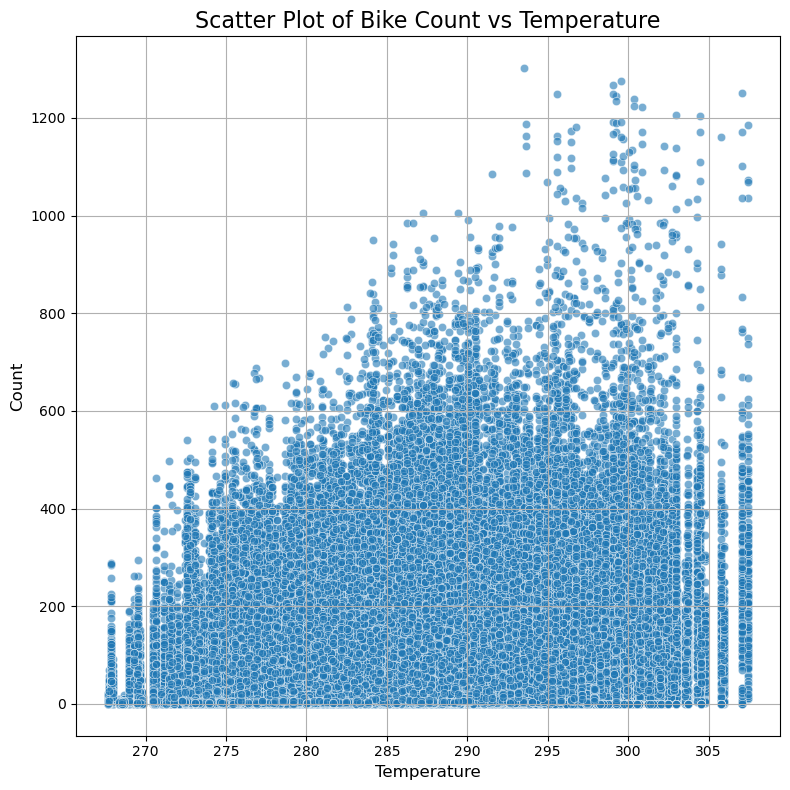

In [ ]:
# Scatter plot: air temperature vs bike count
plt.figure(figsize=(8, 8))
sns.scatterplot(data=data, x="air_temperature", y="bike_count", alpha=0.6)

# Add labels and title
plt.title("Scatter Plot of Bike Count vs Temperature", fontsize=16)
plt.xlabel("Temperature", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
data.columns

Index(['counter_id', 'counter_name', 'site_id', 'site_name', 'bike_count',
       'date', 'counter_installation_date', 'coordinates',
       'counter_technical_id', 'latitude', 'longitude', 'log_bike_count',
       'lockdown', 'hour', 'day_of_week', 'month', 'day', 'is_weekend',
       'station_id', 'sea_level_pressure', 'pressure_tendency',
       'pressure_tendency_code', 'wind_direction', 'wind_speed',
       'air_temperature', 'dew_point_temperature', 'relative_humidity',
       'visibility', 'current_weather_code', 'past_weather_1',
       'past_weather_2', 'total_cloud_cover', 'low_cloud_cover',
       'low_cloud_height', 'low_cloud_type', 'medium_cloud_type',
       'high_cloud_type', 'station_pressure', 'barometric_level',
       'geopotential_height', '24hr_pressure_tendency', '12hr_min_temperature',
       '24hr_min_temperature', '12hr_max_temperature', '24hr_max_temperature',
       'min_ground_temperature', 'sunshine_duration', 'wet_bulb_temperature',
       '10min_max_wind

In [38]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols


# One-Way ANOVA function
def perform_anova(target, explanatory, df):
    """
    Perform one-way ANOVA and return a results table with R-squared, F-statistic, and P-value.
    """
    result_table = []

    # Iterate through explanatory variables
    for column in explanatory.columns:
        if df[column].dtype == "object":
            continue

        # Specify the ANOVA formula
        formula = f"{target.name} ~ {column}"

        try:
            result = ols(formula, data=df).fit()

            # Extract R-squared, F-statistic, and P-value
            result_table.append(
                [column, result.rsquared, result.fvalue, result.f_pvalue]
            )
        except Exception as e:
            print(f"Error processing column {column}: {e}")

    table = pd.DataFrame(
        result_table,
        columns=["Explanatory Variable", "R-squared", "F-statistic", "P-value"],
    )
    return table


# Select numeric columns only for explanatory variables
data = data.select_dtypes(include=["int", "float"])
target = data["bike_count"]
explanatory = data.drop(columns=["bike_count", "log_bike_count"], errors="ignore")

anova_results = perform_anova(target, explanatory, data)

Error processing column barometric_level: zero-size array to reduction operation maximum which has no identity
Error processing column geopotential_height: zero-size array to reduction operation maximum which has no identity
Error processing column 24hr_pressure_tendency: invalid syntax (<unknown>, line 1)
Error processing column 12hr_min_temperature: invalid syntax (<unknown>, line 1)
Error processing column 24hr_min_temperature: invalid syntax (<unknown>, line 1)
Error processing column 12hr_max_temperature: invalid syntax (<unknown>, line 1)
Error processing column 24hr_max_temperature: invalid syntax (<unknown>, line 1)
Error processing column sunshine_duration: zero-size array to reduction operation maximum which has no identity
Error processing column wet_bulb_temperature: zero-size array to reduction operation maximum which has no identity
Error processing column 10min_max_wind_gust: invalid syntax (<unknown>, line 1)
Error processing column 1hr_precipitation: invalid syntax (<u

In [34]:
anova_results

Explanatory Variable     R-squared   F-statistic   P-value
0                    site_id  1.210528e-05      6.014281  0.014191
1                   latitude  1.739221e-02   8793.830001       0.0
2                  longitude  2.126040e-04    105.649429       0.0
3                   lockdown  3.829815e-03   1910.063019       0.0
4                       hour  1.733873e-02   8766.313654       0.0
5                      month  1.067244e-03    530.800188       0.0
6                 station_id  7.949197e-14           NaN       nan
7         sea_level_pressure  1.844036e-03    917.855603       0.0
8          pressure_tendency  6.040470e-03   3019.294502       0.0
9     pressure_tendency_code  6.732525e-03   3367.558743       0.0
10            wind_direction  4.125796e-04    205.064455       0.0
11                wind_speed  5.259850e-03   2627.042744       0.0
12           air_temperature  5.826692e-02  30739.560777       0.0
13     dew_point_temperature  9.709217e-03   4871.076305       0.0
14         relative_humidity  6.557736e-02  34866.952164       0.0
15                visibility  5.667729e-04    281.746647       0.0
16      current_weather_code  6.706203e-03   3354.303905       0.0
17            past_weather_1  3.500060e-03   1740.936647       0.0
18            past_weather_2  3.337460e-03   1658.140464       0.0
19         total_cloud_cover  7.857228e-04    390.673702       0.0
20           low_cloud_cover  2.084403e-03   1036.004773       0.0
21          low_cloud_height  1.366455e-03    586.404954       0.0
22            low_cloud_type  5.423844e-05     23.601565  0.000001
23         medium_cloud_type  5.913154e-04    167.424699       0.0
24           high_cloud_type  1.422233e-05      3.453259  0.063128
25          station_pressure  2.484890e-03   1237.630656       0.0
26    min_ground_temperature  0.000000e+00           NaN       nan
27      period_max_wind_gust  8.795881e-03   4408.792805       0.0
28      gust_period_duration -1.333984e-06     -0.662756       1.0
29              ground_state  7.040614e-03   3464.981666       0.0
30                snow_depth  4.836545e-05     24.030329  0.000001
31          fresh_snow_depth  3.456975e-04    171.810535       0.0
32         snowfall_duration  9.331871e-05     40.107927       0.0
33        cloud_cover_layer1  7.643638e-03   3306.003575       0.0
34         cloud_type_layer1  5.616305e-04    211.822764       0.0
35  cloud_base_height_layer1  1.472274e-03    631.388432       0.0
36        cloud_cover_layer2  9.219318e-03   2354.721958       0.0
37         cloud_type_layer2  9.409164e-04    203.345531       0.0
38  cloud_base_height_layer2  3.180126e-03    807.320568       0.0
39        cloud_cover_layer3  1.063340e-02    970.494488       0.0
40         cloud_type_layer3  4.036420e-04     27.609763       0.0
41  cloud_base_height_layer3  3.672772e-03    332.866480       0.0
42        cloud_cover_layer4  9.580402e-03     54.826983       0.0
43         cloud_type_layer4  2.019165e-02    254.176011       0.0
44  cloud_base_height_layer4  1.541743e-02     88.754342       0.0

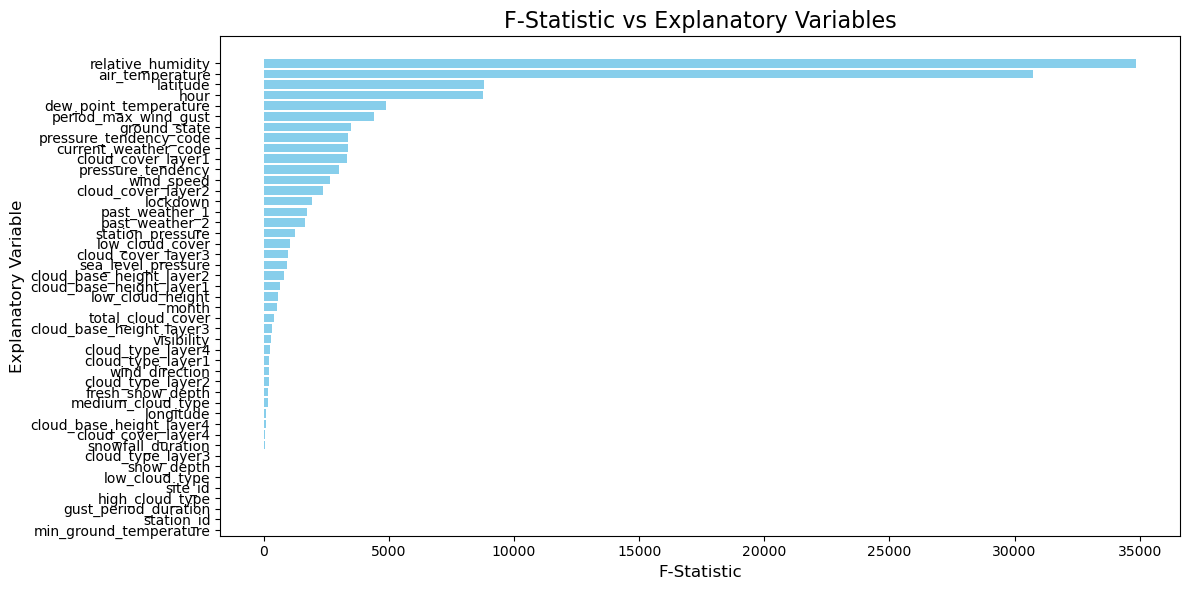

In [ ]:
anova_results_sorted = anova_results.sort_values(by="F-statistic", ascending=False)

# Plot F-statistic vs. explanatory variables
plt.figure(figsize=(12, 6))
plt.barh(
    anova_results_sorted["Explanatory Variable"],
    anova_results_sorted["F-statistic"],
    color="skyblue",
)
plt.xlabel("F-Statistic", fontsize=12)
plt.ylabel("Explanatory Variable", fontsize=12)
plt.title("F-Statistic vs Explanatory Variables", fontsize=16)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest F-stat on top
plt.tight_layout()
plt.show()